In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from google.colab.patches import cv2_imshow

# Task 1: Image Compression

def compress_image(image_path, output_path, quality=50, format='JPEG'):
    # Check if the image was loaded successfully
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}. Check the file path.")
        return  # Exit the function if image loading failed

    cv2.imwrite(output_path, image, [cv2.IMWRITE_JPEG_QUALITY if format == 'JPEG' else cv2.IMWRITE_PNG_COMPRESSION, quality])
    compressed_image = cv2.imread(output_path)
    compressed_image = cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB)
    plt.imshow(compressed_image)
    plt.title(f"Compressed Image - {format}")
    plt.axis('off')
    plt.show()
    print(f"Image saved at {output_path} with quality {quality}")

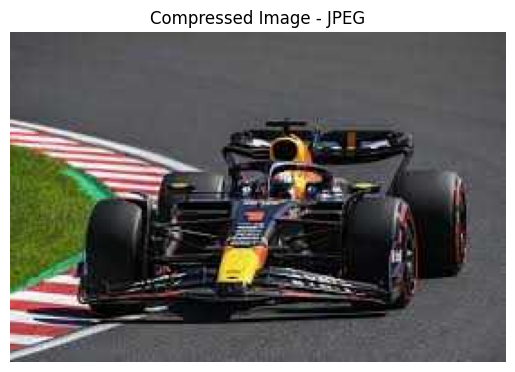

Image saved at compressed.jpg with quality 50


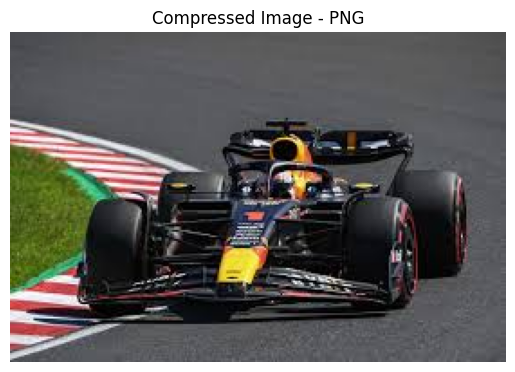

Image saved at compressed.png with quality 9


In [ ]:
compress_image('/content/images.jpeg', 'compressed.jpg', quality=50, format='JPEG')
compress_image('/content/images.jpeg', 'compressed.png', quality=9, format='PNG')

In [ ]:
def train_mnist():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    print(classification_report(y_true_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

    return model

In [ ]:
def train_cifar10():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    print(classification_report(y_true_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

    return model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 52ms/step - accuracy: 0.8368 - loss: 0.5079 - val_accuracy: 0.9848 - val_loss: 0.0456
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9746 - loss: 0.0864 - val_accuracy: 0.9874 - val_loss: 0.0363
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.9803 - loss: 0.0657 - val_accuracy: 0.9894 - val_loss: 0.0288
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9837 - loss: 0.0527 - val_accuracy: 0.9903 - val_loss: 0.0281
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9874 - loss: 0.0405 - val_accuracy: 0.9915 - val_loss: 0.0244
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9896 - loss: 0.0342 - val_accuracy: 0.9923 - val_loss: 0.0226
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9906 - loss: 0.0302 - val_accuracy: 0.9923 - val_loss: 0.0238
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9918 - loss: 0.0248 - 

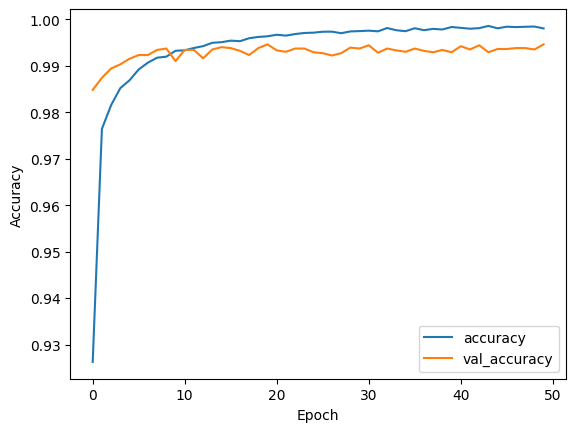

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      1.00      1.00       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



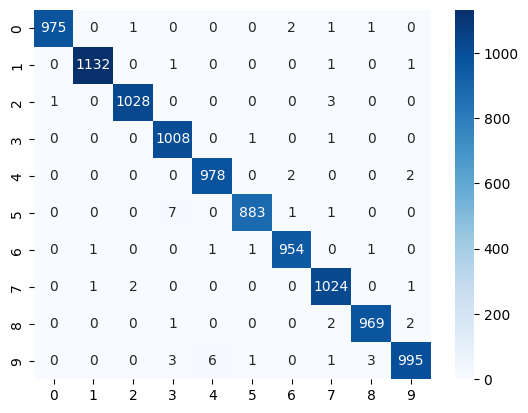

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 84ms/step - accuracy: 0.2749 - loss: 1.9290 - val_accuracy: 0.4879 - val_loss: 1.4196
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.4941 - loss: 1.4090 - val_accuracy: 0.5760 - val_loss: 1.1944
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.5714 - loss: 1.2132 - val_accuracy: 0.6264 - val_loss: 1.0697
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.6174 - loss: 1.0921 - val_accuracy: 0.6269 - val_loss: 1.0516
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.6557 - loss: 0.9918 - val_accuracy: 0.6654 - val_loss: 0.9492
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.6823 - loss: 0.9073 - val_accuracy: 0.6915 - val_loss: 0.8820
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.7030 - loss: 0.8643 - val_accuracy: 0.6827 - val_loss: 0.9050
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7222 - loss: 0.8064 - 

In [ ]:
 model_mnist = train_mnist()
 model_cifar10 = train_cifar10()